[1.1414175033569336, 1.1160202026367188, 1.1053695678710938, 1.0944747924804688, 1.0774688720703125, 1.0704269409179688, 1.0573348999023438, 1.0303421020507812, 1.022216796875, 1.0127182006835938, 1.0020599365234375, 0.9827499389648438, 0.8401412963867188, 0.7752685546875, 0.7848129272460938, 0.7773666381835938, 0.76153564453125, 0.7565078735351562, 0.7580337524414062, 0.7464447021484375, 0.7424774169921875, 0.7391357421875, 0.7319183349609375, 0.7222518920898438, 0.7195053100585938, 0.7282485961914062, 0.7134780883789062, 0.69720458984375, 0.6916885375976562, 0.7222824096679688, 0.6822662353515625, 0.676666259765625, 0.701690673828125, 0.6591796875, 0.7020950317382812, 0.6521453857421875, 0.689178466796875, 0.65625, 0.6608123779296875, 0.6739883422851562, 0.6339492797851562, 0.647735595703125, 0.6591949462890625, 0.6618194580078125, 0.73828125, 0.73828125, 0.73828125, 0.7241287231445312, 0.697296142578125, 0.6926803588867188, 0.715972900390625, 0.7262496948242188, 0.6659164428710938, 

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


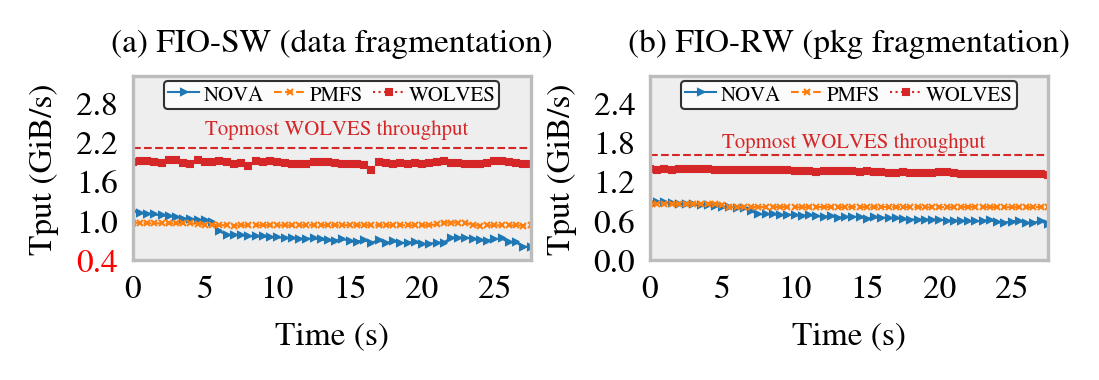

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table-fsize", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)

fss = ["NOVA", "WINEFS", "KILLER"]

bws_array = []
lat_array = []

for fs in fss:
    with open(f"./seq-{fs}_bw.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        bws = df.iloc[:, 1].values
        bws = [float(bw) / 1024 / 1024 for bw in bws]
        bws_array.append(bws)
    with open(f"./rand-{fs}_bw.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        bws = df.iloc[:, 1].values
        # lats = [float(lat / 1000) for lat in lats]
        bws = [float(bw) / 1024 / 1024 for bw in bws]
        lat_array.append(bws)

# extend NOVA array to the same size as others with the last 10 values
extend_bws = bws_array[0][-8:] * ((len(bws_array[1]) - len(bws_array[0])) // 8)
extend_lats = lat_array[0][-8:] * ((len(lat_array[1]) - len(lat_array[0])) // 8)
bws_array[0].extend(extend_bws)
lat_array[0].extend(extend_lats)

bws_array[0] = bws_array[0][:120]
bws_array[1] = bws_array[1][:120]
lat_array[0] = lat_array[0][:120]
lat_array[1] = lat_array[1][:120]
 
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)

gs0 = gridspec.GridSpec(1, 2, hspace=0)
for array_idx, array in enumerate([bws_array, lat_array]):
    lines = []
    cmap = "tab10"
    # gs0_fid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[array_idx], width_ratios=[6, 1], wspace=0.05)
    # ax_left = plt.subplot(gs0_fid[0])
    # ax_right = plt.subplot(gs0_fid[1])
    ax = fig.add_subplot(1, 2, array_idx + 1)
    for idx, fs in enumerate(fss):
        
        if fs == "PMM":
            continue
        bws = array[idx]
        if idx > 1:
            color_idx = idx + 1
        else:
            color_idx = idx
        if array_idx == 1:
            bws = bws[1:-1]
        print(bws)
        # if fs == "PMFS":
        #     line, = ax.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1, markeredgewidth=0.5, linestyle=line_types[color_idx], zorder=10)
        # else:
        line, = ax.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        
        if fs == "KILLER" and array_idx == 0:
            ax.hlines(y=2.1, xmin=0, xmax=len(bws), color=plt.get_cmap(cmap)(color_idx), linestyle='--', linewidth=0.5)
            ax.text(10, 2.4, "Topmost WOLVES throughput", fontsize=5, color=plt.get_cmap(cmap)(color_idx), ha='left', va='center')
        if fs == "KILLER" and array_idx == 1:
            ax.hlines(y=1.6, xmin=0, xmax=len(bws), color=plt.get_cmap(cmap)(color_idx), linestyle='--', linewidth=0.5)
            ax.text(10, 1.8, "Topmost WOLVES throughput", fontsize=5, color=plt.get_cmap(cmap)(color_idx), ha='left', va='center')
            # ax.hlines(y=1.6, xmin=0, xmax=len(bws), color="lightgray", linestyle='--', linewidth=0.5)
            
        # line, = ax_right.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        lines.append(line)
        
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    ax.set_title("(a) FIO-SW (data fragmentation)" if array_idx == 0 else "(b) FIO-RW (pkg fragmentation)", fontsize=8, loc='center')
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.set_xlim(0, 55)
    # ax_right.set_xlim(105, 130)
    # ax_right.set_xticks([105, 120])

    ax.set_xticklabels([0, 5, 10, 15, 20, 25], fontsize=8)
    # ax_right.set_xticklabels(["", 60], fontsize=8)

    ax.set_xlabel("Time (s)", fontsize=8)
    _fss= ["NOVA", "PMFS", "WOLVES"]
    if array_idx == 0:
        # ax.set_ylim(0, 2.2)
        # # ax_right.set_ylim(0, 2.5)
        # ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        # ax.set_yticklabels([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4], fontsize=8)
        ax.set_ylim(0.4, 3.2)
        # ax_right.set_ylim(0, 10)
        
        ax.set_yticks(np.linspace(0.4, 2.8, 5))
        ax.set_yticklabels(["0.4", "1.0", "1.6", "2.2", "2.8"], fontsize=8)
        # ax_right.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        # ax_right.set_yticklabels([])
        ax.set_ylabel('Tput (GiB/s)', fontsize=8)
        ax.get_yticklabels()[0].set_color('red')

        start = 0
        end = 3
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

    else:
        ax.set_ylim(0, 2.8)
        # ax_right.set_ylim(0, 10)
        
        ax.set_yticks(np.linspace(0, 2.4, 5))
        ax.set_yticklabels(["0.0", "0.6", "1.2", "1.8", "2.4"], fontsize=8)
        # ax.set_ylim(0, 8)
        # # ax_right.set_ylim(0, 10)
        # ax.set_yticks(np.linspace(0,8, 5))
        # ax.set_yticklabels(np.linspace(0, 8, 5), fontsize=8)
        # ax_right.set_yticks(np.linspace(0, 9, 7))
        # ax_right.set_yticklabels([])
        ax.set_ylabel('Tput (GiB/s)', fontsize=8)

        start = 0
        end = 3
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')

    
# plt.xlabel("Time (s)", fontsize=8) 
# fss.replace("SplitFS-FIO", "SplitFS", inplace=True)
# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
    
# fig.text(0.5, -0.05, "Time (s)", size=8, va='center', ha='center')
plt.tight_layout(rect=[0, 0, 1, 1], pad=0.4)
# plt.tight_layout(pad=0.4)

# gs0.tight_layout(fig)
plt.savefig("./FIG-Aging.pdf", bbox_inches='tight', pad_inches=0)
